In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import kagglehub
import seaborn as sns

path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

100%|██████████| 6.18k/6.18k [00:00<00:00, 1.47MB/s]

Extracting files...


In [7]:
heart = pd.read_csv(path + "/heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
heart.replace({'sex': {0: 'female', 1: 'male'}}, inplace=True)

In [9]:
heart.rename(columns={'thalach': 'max_heart_rate', 'cp': 'chest_pain', 'trestbps': 'resting_bp', 'ca':'vessels', 'oldpeak':'st_dep'}, inplace=True)
heart.head()

,age,sex,chest_pain,resting_bp,chol,fbs,restecg,max_heart_rate,exang,st_dep,slope,vessels,thal,target
0,52,male,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,male,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,male,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,male,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,female,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1025 non-null   int64  
 1   sex             1025 non-null   object 
 2   chest_pain      1025 non-null   int64  
 3   resting_bp      1025 non-null   int64  
 4   chol            1025 non-null   int64  
 5   fbs             1025 non-null   int64  
 6   restecg         1025 non-null   int64  
 7   max_heart_rate  1025 non-null   int64  
 8   exang           1025 non-null   int64  
 9   st_dep          1025 non-null   float64
 10  slope           1025 non-null   int64  
 11  vessels         1025 non-null   int64  
 12  thal            1025 non-null   int64  
 13  target          1025 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 112.2+ KB


In [11]:
X = heart.drop('target', axis=1)
y = heart['target']

In [12]:
round(y.value_counts(normalize=True)*100,2)

,proportion
target,
1,51.32
0,48.68


In [13]:
df = pd.concat([heart['sex'], y], axis=1)
df.value_counts(normalize=True)

sex     target
male    0         0.402927
        1         0.292683
female  1         0.220488
        0         0.083902
Name: proportion, dtype: float64

In [14]:
y.value_counts(normalize=True)

,proportion
target,
1,0.513171
0,0.486829


In [15]:
heart['age'].min()

29

In [16]:
heart['age'].max()

77

### Exploratory Data Analysis

In [17]:
colors = ['crimson', 'dodgerblue']

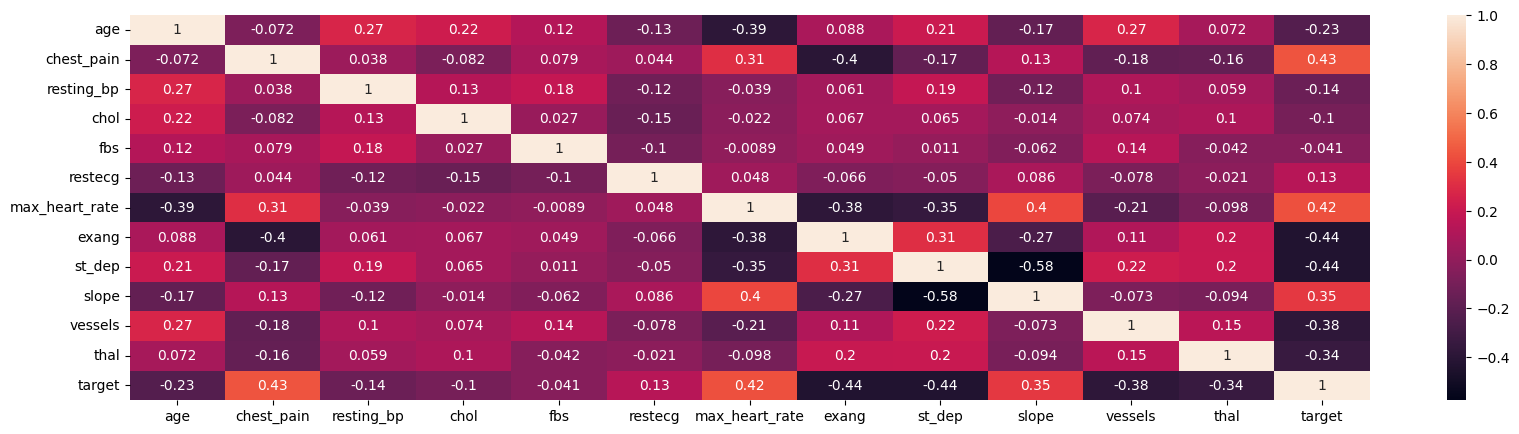

In [18]:
plt.figure(figsize = (20, 5))
sns.heatmap(heart.corr(numeric_only=True), annot = True);

In [19]:
# transformed_data = transformer.fit_transform(heart)

# transformed_columns = transformer.get_feature_names_out()
# transformed_df = pd.DataFrame(transformed_data, columns=transformed_columns)

# correlation_matrix = transformed_df.corr()

# correlation_matrix.head()

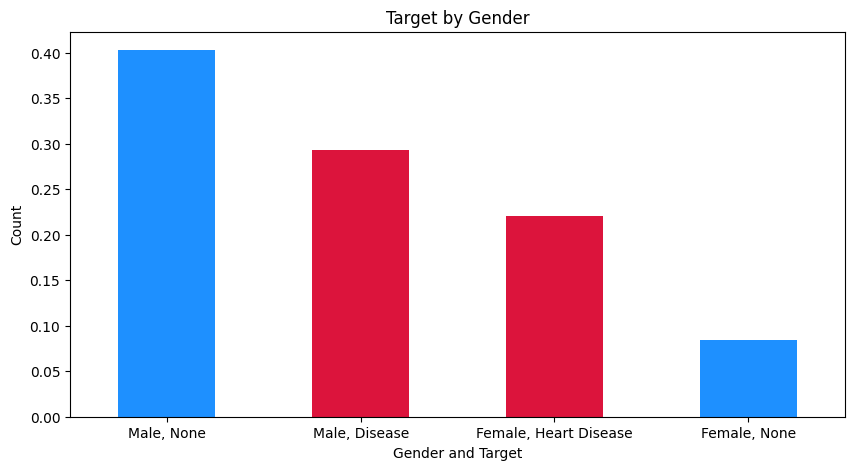

In [20]:
plt.figure(figsize = (10, 5))
df.value_counts(normalize=True).plot(kind='bar', color=['dodgerblue', 'crimson', 'crimson', 'dodgerblue'])
plt.title('Target by Gender')
plt.xlabel('Gender and Target')
plt.xticks(np.arange(4), ['Male, None', 'Male, Disease', 'Female, Heart Disease', 'Female, None'])
plt.xticks(rotation=0)
plt.ylabel('Count');

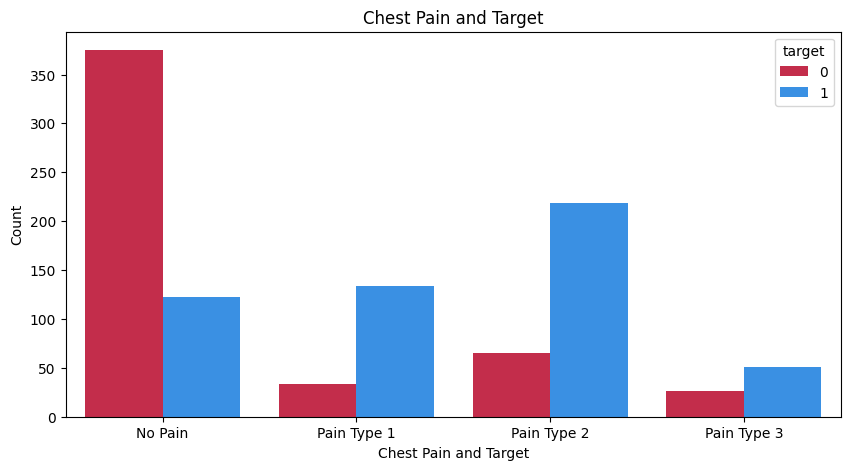

In [39]:
plt.figure(figsize = (10, 5))
# heart['chest_pain'].plot(kind='bar', color=['dodgerblue', 'crimson', 'crimson', 'dodgerblue'])
sns.countplot(data = heart, x = 'chest_pain', hue='target', palette=colors)
plt.title('Chest Pain and Target')
plt.xlabel('Chest Pain and Target')
plt.xticks(np.arange(4), ['No Pain', 'Pain Type 1', 'Pain Type 2', 'Pain Type 3'])
plt.xticks(rotation=0)
plt.ylabel('Count');

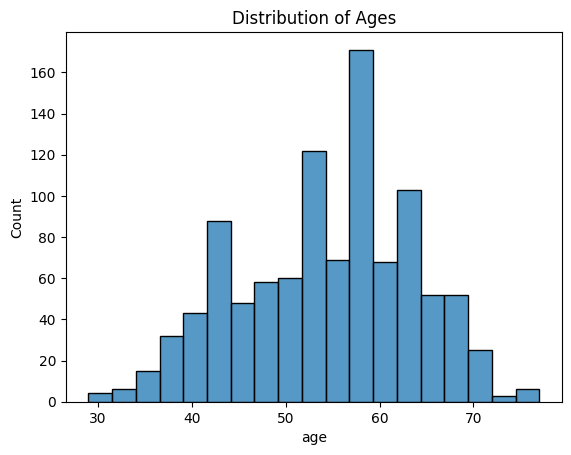

In [21]:
sns.histplot(data = heart, x = 'age')
plt.title('Distribution of Ages');

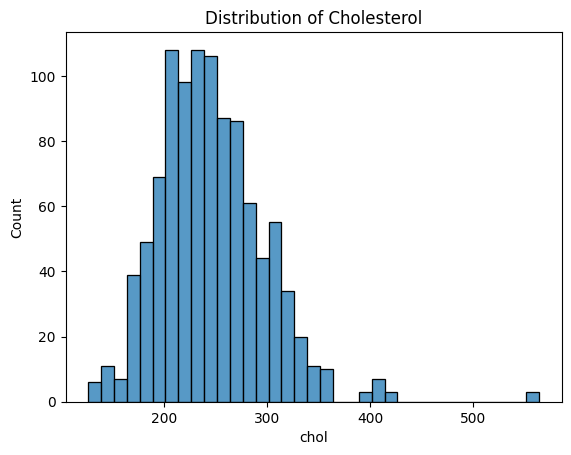

In [22]:
sns.histplot(data = heart, x = 'chol')
plt.title('Distribution of Cholesterol');

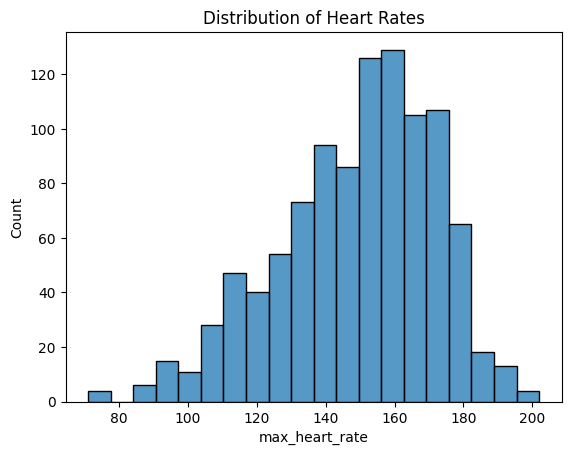

In [23]:
sns.histplot(data = heart, x = 'max_heart_rate')
plt.title('Distribution of Heart Rates');

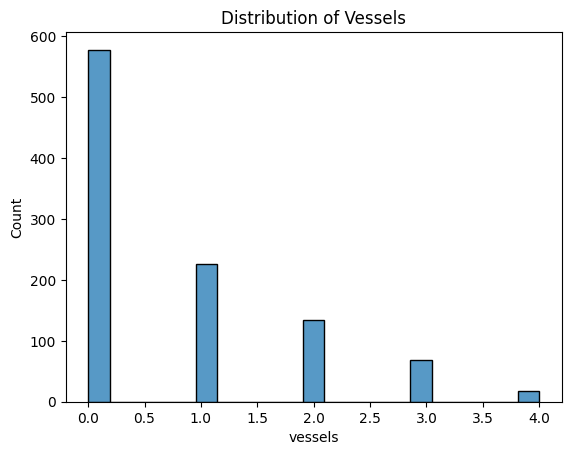

In [24]:
sns.histplot(data = heart, x = 'vessels')
plt.title('Distribution of Vessels');

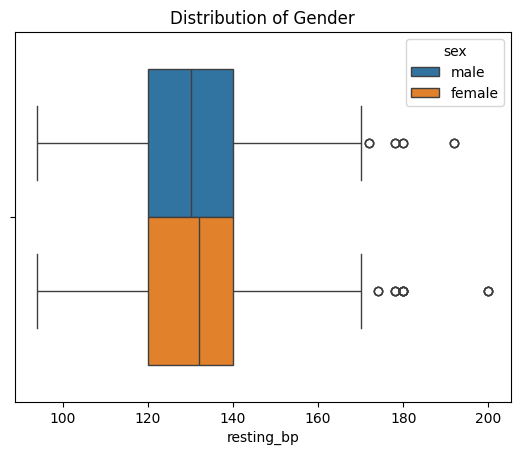

In [25]:
sns.boxplot(data = heart, x = 'resting_bp', hue='sex')
plt.title('Distribution of Gender');

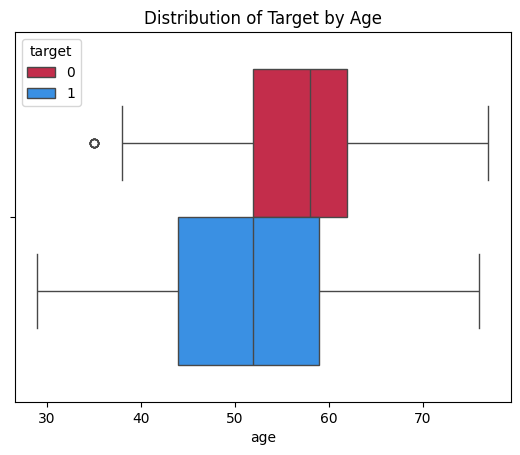

In [34]:
sns.boxplot(data = heart, x = 'age', hue='target', palette=colors)
plt.title('Distribution of Target by Age');

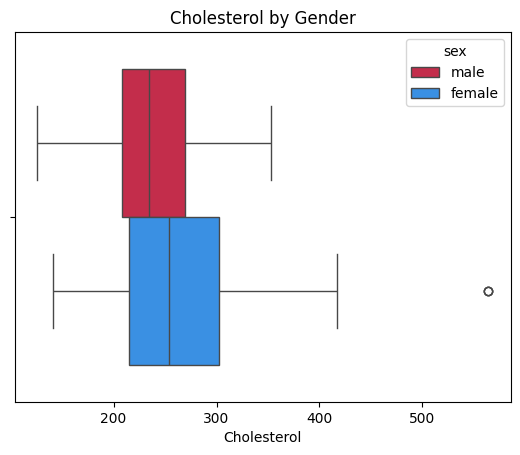

In [27]:
sns.color_palette("tab10")
sns.boxplot(data = heart, x = 'chol', hue='sex', palette=colors)
plt.title('Cholesterol by Gender')
plt.xlabel('Cholesterol');

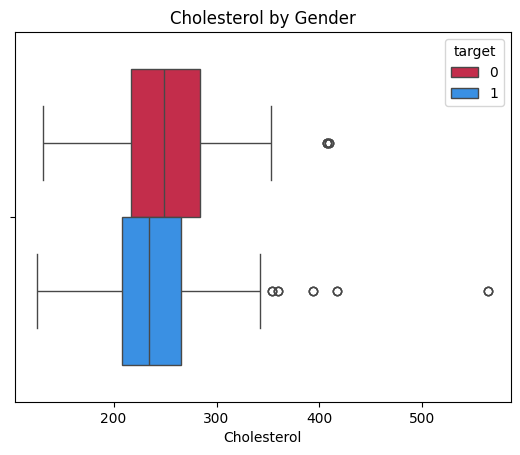

In [28]:
sns.color_palette("tab10")
sns.boxplot(data = heart, x = 'chol', hue='target', palette=colors);
plt.title('Cholesterol by Gender')
plt.xlabel('Cholesterol');

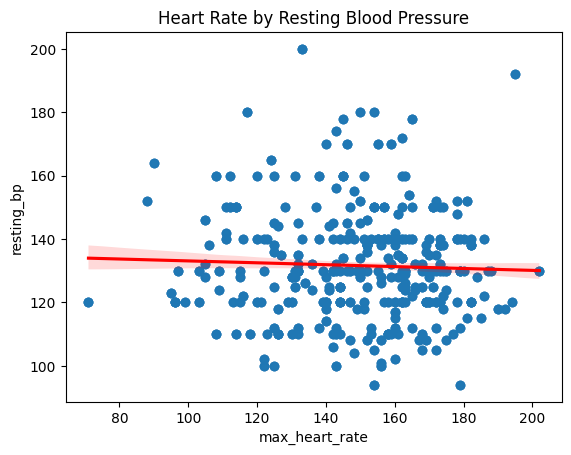

In [29]:
sns.regplot(data = heart, x = 'max_heart_rate', y = 'resting_bp', line_kws={'color': 'red'});
plt.title('Heart Rate by Resting Blood Pressure');

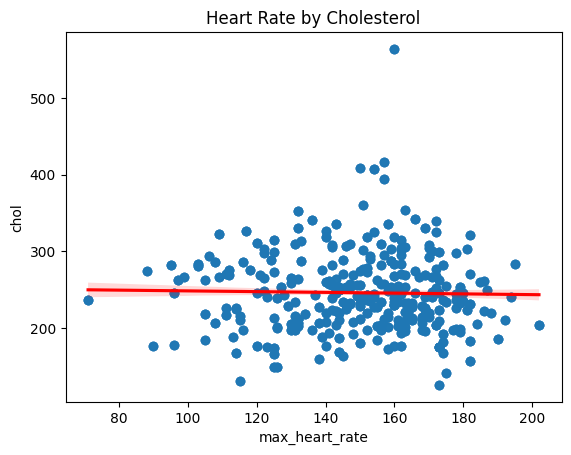

In [30]:
sns.regplot(data = heart, x = 'max_heart_rate', y = 'chol', line_kws={'color': 'red'});
plt.title('Heart Rate by Cholesterol');

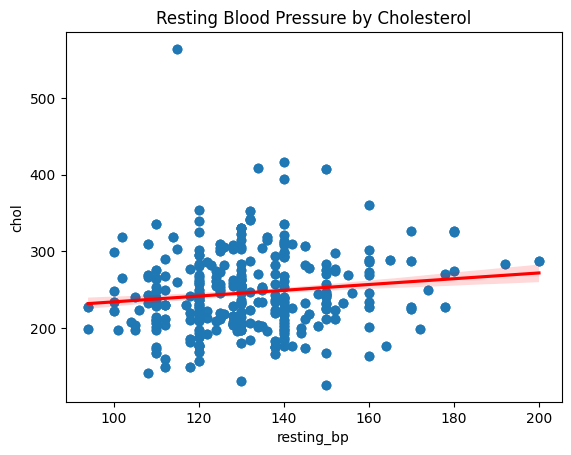

In [31]:
sns.regplot(data = heart, x = 'resting_bp', y = 'chol', line_kws={'color': 'red'});
plt.title('Resting Blood Pressure by Cholesterol');

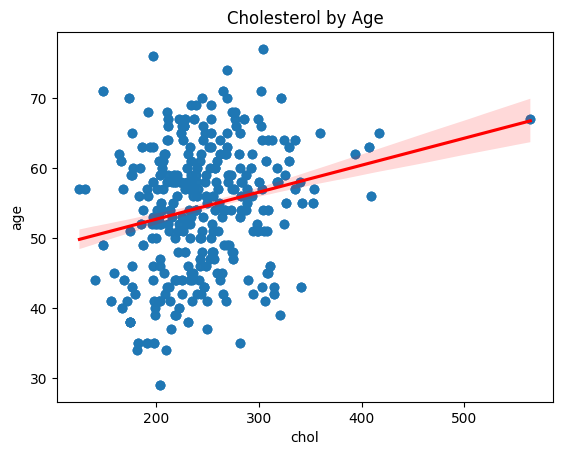

In [32]:
sns.regplot(data = heart, x = 'chol', y = 'age', line_kws={'color': 'red'});
plt.title('Cholesterol by Age');

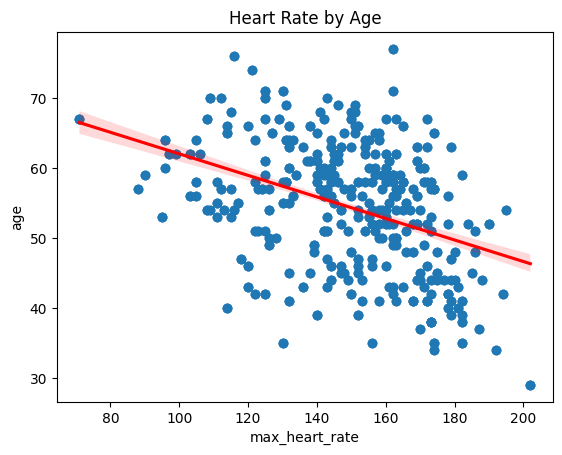

In [33]:
sns.regplot(data = heart, x = 'max_heart_rate', y = 'age', line_kws={'color': 'red'});
plt.title('Heart Rate by Age');